# <font face = 'Impact' color = '#FFAEBC' > Exploring Associations between Variables <font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook provides a comprehensive analysis of variable associations while ensuring key statistical assumptions are met. It begins with an exploratory data analysis, checking for normality, linearity, presence of outliers, and homoscedasticity using visualizations and statistical tests. After verifying assumptions, the notebook applies appropriate correlation techniques such as Pearson, Spearman, and Kendall’s Tau-b, ensuring robust insights into the relationships between variables.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import qdesc as qd

In [2]:
# Loading our data set
df = pd.read_excel("RadioAds.xlsx")
df.head()

,RAspend,Sales
0,2.30,4.39
1,2.96,3.62
2,1.46,2.76
3,3.32,3.28
4,2.98,1.96


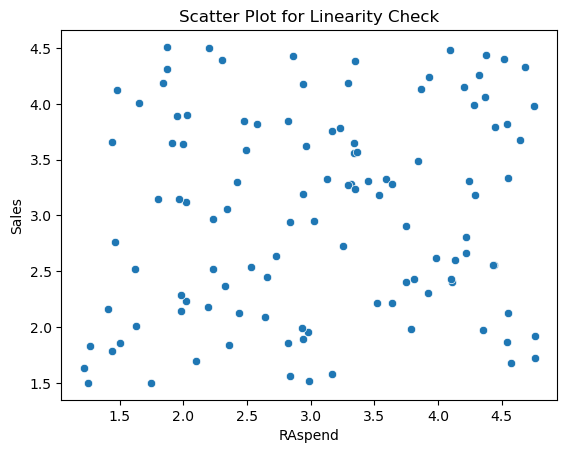

In [3]:
# Checking the linearity assumption of the variables using a scatter plot.
sns.scatterplot(x=df['RAspend'], y=df['Sales'])
plt.title('Scatter Plot for Linearity Check')
plt.show()


--- Variable: RAspend ---
  Anderson-Darling Statistic : 1.3352
  Critical Value (@ 5.0%) : 0.7620
  Decision : Reject Null


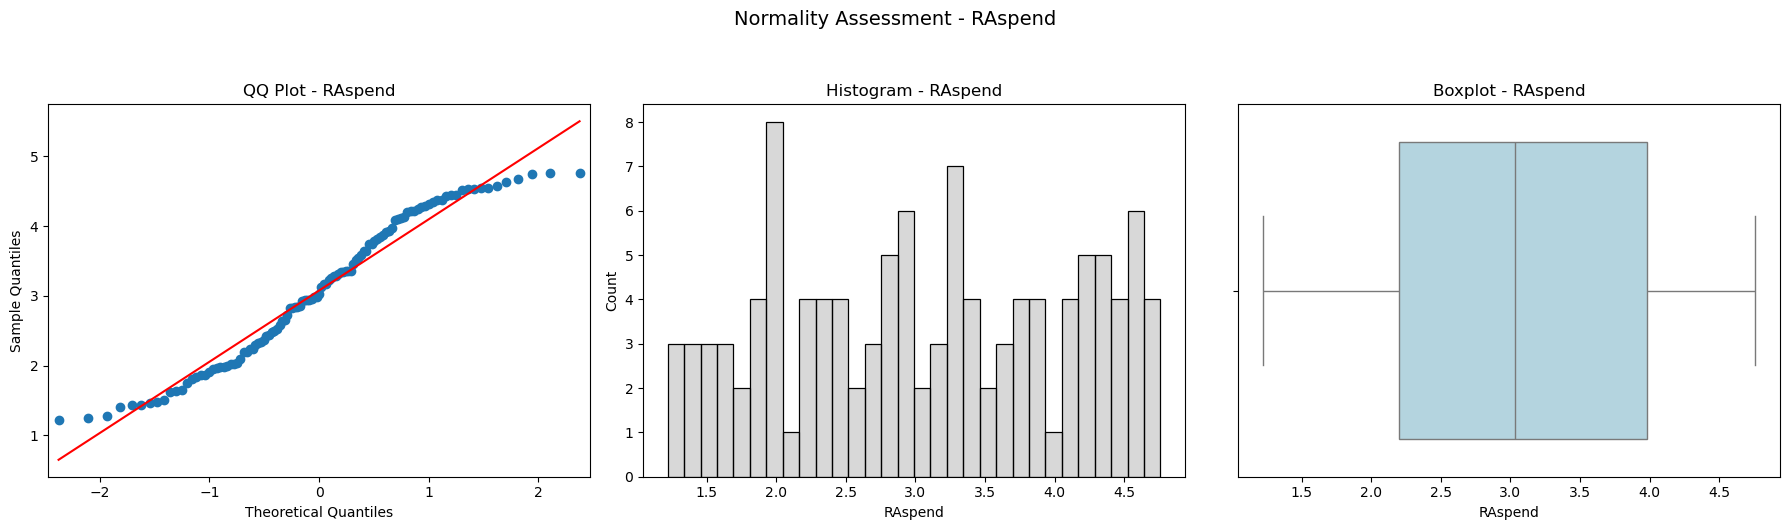


--- Variable: Sales ---
  Anderson-Darling Statistic : 1.6418
  Critical Value (@ 5.0%) : 0.7620
  Decision : Reject Null


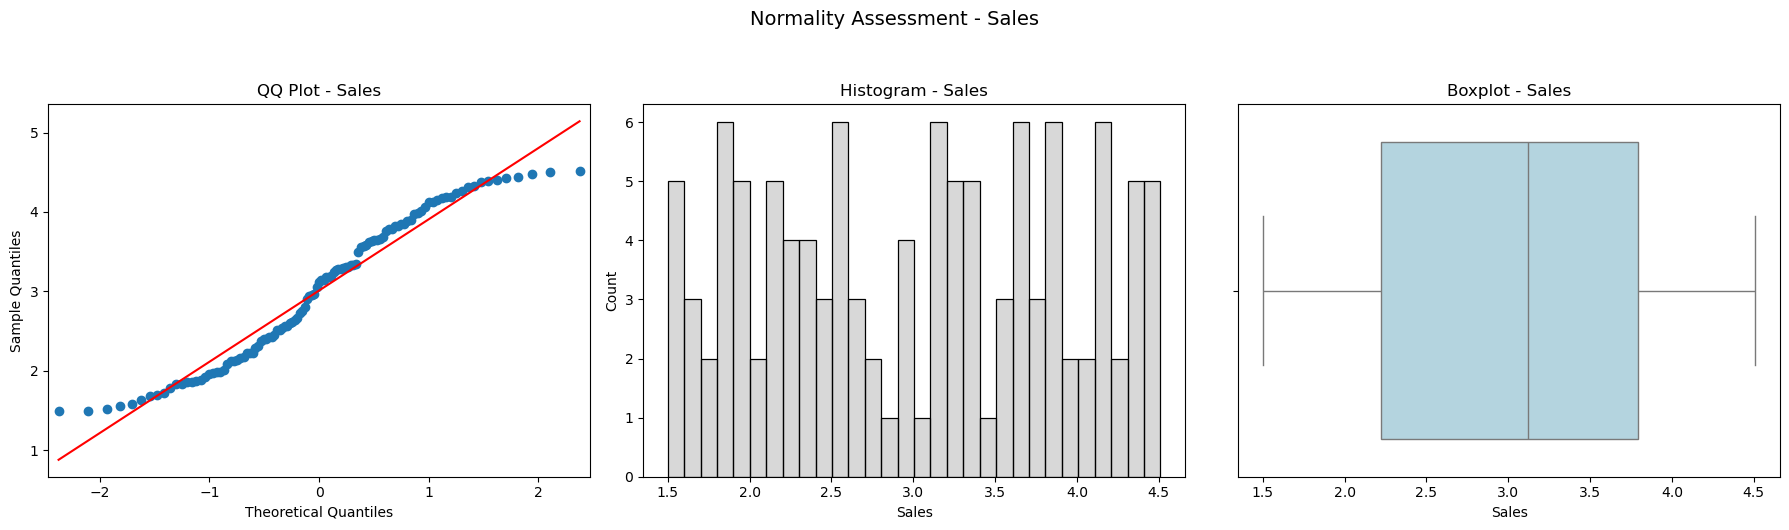

In [4]:
# Doing a normality check using histograms and AD-test
qd.normcheck_dashboard(df)

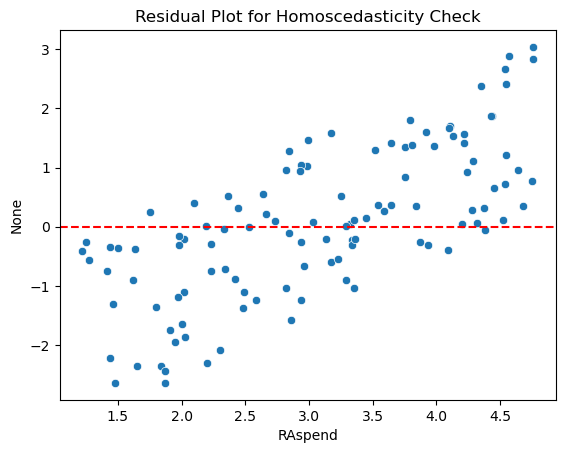

In [5]:
# Doing a homoscedasticity check with residual plots
residuals = df['RAspend'] - df['Sales']
sns.scatterplot(x=df['RAspend'], y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Homoscedasticity Check')
plt.show()

In [6]:
# Choosing the Kendall's tau-b given the assumption check results.
kendall_corr, kendall_p = stats.kendalltau(df['RAspend'], df['Sales'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: 0.0934, p-value: 0.1438


In [7]:
# Another Alternative is the Spearman Rho
# Spearman's rank correlation
spearman_corr, spearman_p = stats.spearmanr(df['RAspend'], df['Sales'])
print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")

Spearman correlation coefficient: 0.1427, p-value: 0.1317


In [8]:
# Computing Pearson Correlation if assumptions are met
pearson_corr, pearson_p = stats.pearsonr(df['RAspend'], df['Sales'])
print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

Pearson correlation coefficient: 0.1409, p-value: 0.1365
